In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r"C:\Users\anami\Downloads\store-sales-time-series-forecasting\train.csv")
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')
df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1194,1194,2013-01-01,42,CELEBRATION,0.0,0
1193,1193,2013-01-01,42,BREAD/BAKERY,0.0,0
1192,1192,2013-01-01,42,BOOKS,0.0,0
1191,1191,2013-01-01,42,BEVERAGES,0.0,0


In [2]:
# Create time index (trend variable)
df['time_index'] = np.arange(len(df))

# Extract seasonal components
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].isin([5,6]).astype(int)

# For simplicity assume no holidays
df['is_holiday'] = 0
df.head()

,id,date,store_nbr,family,sales,onpromotion,time_index,month,day_of_week,is_weekend,is_holiday
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,0,1,1,0,0
1194,1194,2013-01-01,42,CELEBRATION,0.0,0,1,1,1,0,0
1193,1193,2013-01-01,42,BREAD/BAKERY,0.0,0,2,1,1,0,0
1192,1192,2013-01-01,42,BOOKS,0.0,0,3,1,1,0,0
1191,1191,2013-01-01,42,BEVERAGES,0.0,0,4,1,1,0,0


In [3]:
poly = PolynomialFeatures(degree=2, include_bias=False)
trend_features = poly.fit_transform(df[['time_index']])
trend_df = pd.DataFrame(trend_features, columns=['time_index', 'time_index_sq'])
df = pd.concat([df, trend_df], axis=1)
df[['date', 'time_index', 'time_index_sq']].head()

,date,time_index,time_index,time_index_sq
0,2013-01-01,0,0.0,0.0
1194,2013-01-01,1,1194.0,1425636.0
1193,2013-01-01,2,1193.0,1423249.0
1192,2013-01-01,3,1192.0,1420864.0
1191,2013-01-01,4,1191.0,1418481.0


In [4]:
features = ['time_index', 'time_index_sq', 'month', 'is_weekend', 'is_holiday']
X = pd.get_dummies(df[features], columns=['month'], drop_first=True)
y = df['sales']
X.head()

,time_index,time_index,time_index_sq,is_weekend,is_holiday,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,0,0.0,0.0,0,0,False,False,False,False,False,False,False,False,False,False,False
1194,1,1194.0,1425636.0,0,0,False,False,False,False,False,False,False,False,False,False,False
1193,2,1193.0,1423249.0,0,0,False,False,False,False,False,False,False,False,False,False,False
1192,3,1192.0,1420864.0,0,0,False,False,False,False,False,False,False,False,False,False,False
1191,4,1191.0,1418481.0,0,0,False,False,False,False,False,False,False,False,False,False,False


In [5]:
split = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Model training complete.')

Model training complete.


In [6]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Mean Absolute Error (MAE): 675.69
Root Mean Squared Error (RMSE): 1361.22


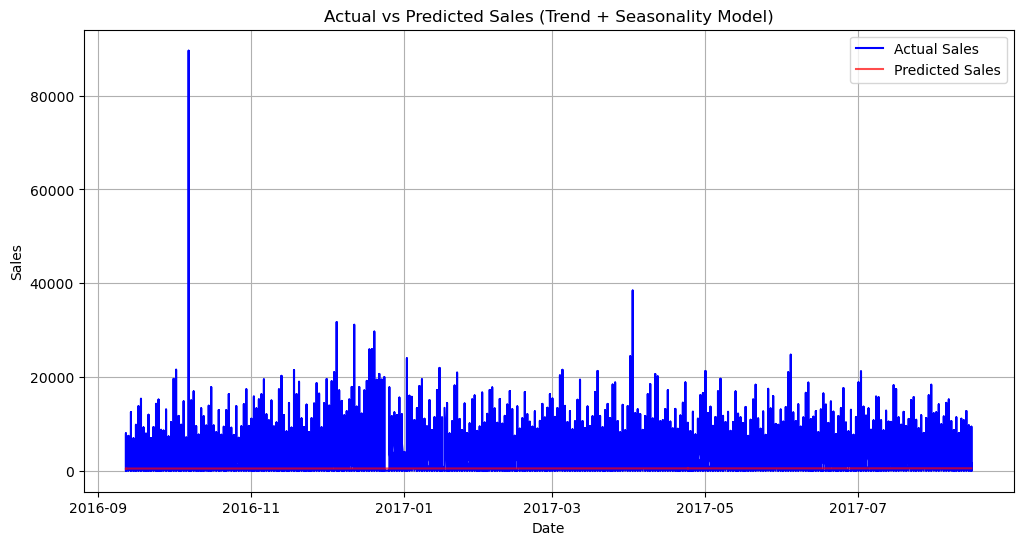

In [7]:
plt.figure(figsize=(12,6))
plt.plot(df['date'].iloc[split:], y_test.values, label='Actual Sales', color='blue')
plt.plot(df['date'].iloc[split:], y_pred, label='Predicted Sales', color='red', alpha=0.7)
plt.title('Actual vs Predicted Sales (Trend + Seasonality Model)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()